# Instalando a API do Kaggle | Download dos datasets

In [3]:
!pip install kaggle

In [8]:
!kaggle competitions download -c walmart-recruiting-store-sales-forecasting


  0%|          | 0.00/2.70M [00:00<?, ?B/s]
 37%|###7      | 1.00M/2.70M [00:00<00:00, 2.43MB/s]
 74%|#######4  | 2.00M/2.70M [00:00<00:00, 2.89MB/s]
100%|##########| 2.70M/2.70M [00:00<00:00, 3.41MB/s]


In [9]:
!unzip walmart-recruiting-store-sales-forecasting.zip

Archive:  walmart-recruiting-store-sales-forecasting.zip
  inflating: features.csv.zip        
  inflating: sampleSubmission.csv.zip  
  inflating: stores.csv              
  inflating: test.csv.zip            
  inflating: train.csv.zip           


In [ ]:
!unzip features.csv.zip
!unzip sampleSubmission.csv.zip
!unzip test.csv.zip
!unzip train.csv.zip

# Prática com Dados
* Elaborar 4 questões que ajudem a compreender os dados.
* Respondê-las com análise de dados.
* Listar 1 limpeza que precisa ser feita nos dados e a executar.

**QUESTÕES ABORDADAS PARA COMPREENÇÃO DO DADO:**
* **Qual a estrutura dos datasets (tipos de variáveis, número de linhas/colunas, etc) ?**
* **Como está a distribuição do conjunto de dados (análise estatística, distribuição, etc) ?**
* **Quais datasets apresentam "missing values" ?**
* **Qual a correlação entre as variáveis ?**

**LIMPEZA PROPOSTA:**
* **Remover as colunas com mais de 50 % de missing value.**

## Qual a estrutura dos datasets (tipos de variáveis, número de linhas/colunas, etc) ?

### Importando as bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Carregando os datasets

In [3]:
features = pd.read_csv("features.csv")
train = pd.read_csv("train.csv")
stores = pd.read_csv("stores.csv")
test = pd.read_csv("test.csv")

### Explorando os datasets

In [4]:
print(features.shape)

(8190, 12)


In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [7]:
print(train.shape)

(421570, 5)


In [8]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [9]:
train.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [10]:
print(stores.shape)

(45, 3)


In [11]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [23]:
stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [12]:
print(test.shape)

(115064, 4)


In [13]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [24]:
test.tail()

,Store,Dept,Date,IsHoliday
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False
115063,45,98,2013-07-26,False


### Verificando os tipos de dados de cada coluna

In [8]:
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB
None


In [15]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


In [26]:
print(stores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB
None


In [27]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
Store        115064 non-null int64
Dept         115064 non-null int64
Date         115064 non-null object
IsHoliday    115064 non-null bool
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB
None


## Como está a distribuição do conjunto de dados (análise estatística, distribuição, etc) ?

### Estatística dos dados númericos

In [32]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [34]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [35]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [36]:
test.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


### Analisando Variáveis categóricas 

In [61]:
print(features.Store.unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [80]:
print(f' Os dataset tem dados de {len(features.Store.unique())} lojas.')

 Os dataset tem dados de 45 lojas.


In [38]:
features.IsHoliday.value_counts()

False    7605
True      585
Name: IsHoliday, dtype: int64

In [84]:
print(train.Dept.unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]


In [75]:
print(len(train.Dept.unique()))

81


In [82]:
print(train.Dept.value_counts().sort_index())

1     6435
2     6435
3     6435
4     6435
5     6347
6     5986
7     6435
8     6435
9     6354
10    6435
11    6434
12    6409
13    6435
14    6435
16    6435
17    6412
18    5029
19    4119
20    6032
21    6435
22    5543
23    5774
24    5406
25    6354
26    5739
27    5619
28    6124
29    5308
30    5291
31    6067
      ... 
54    4767
55    5596
56    5872
58    4390
59    6106
60    5772
65     143
67    6435
71    5309
72    6046
74    6430
77     150
78     235
79    6435
80    5891
81    6435
82    6435
83    5908
85    6055
87    6391
90    6435
91    6435
92    6435
93    5913
94    5685
95    6435
96    4854
97    6278
98    5836
99     862
Name: Dept, Length: 81, dtype: int64


In [72]:
print(stores["Type"].unique())

['A' 'B' 'C']


In [73]:
print(stores.Type.value_counts())

A    22
B    17
C     6
Name: Type, dtype: int64


### Analisando a distribuição dos dados númericos

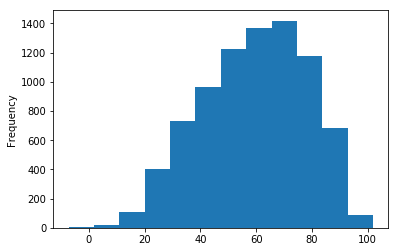

In [103]:
features['Temperature'].plot.hist(bins= 12)

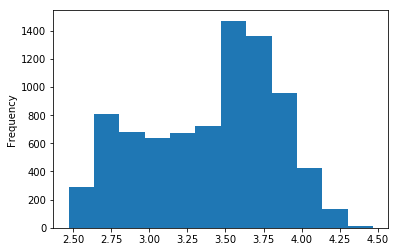

In [122]:
features['Fuel_Price'].plot.hist(bins= 12)

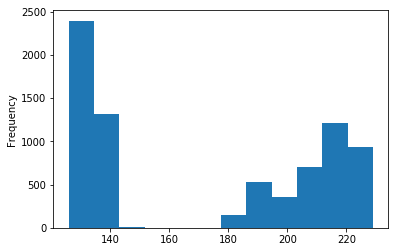

In [105]:
features['CPI'].plot.hist(bins= 12)

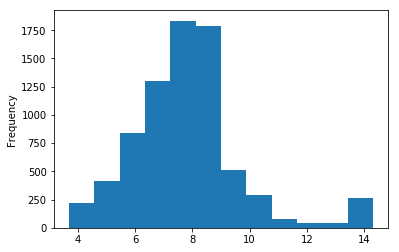

In [106]:
features['Unemployment'].plot.hist(bins= 12)

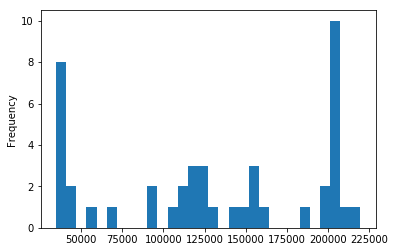

In [120]:
stores['Size'].plot.hist(bins= 30)

## Quais datasets apresentam "missing values" ?

### Quantidade de **"missing values"** em cada coluna

In [9]:
print(features.isnull().sum())

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


In [16]:
print(train.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64


In [27]:
print(stores.isnull().sum())

Store    0
Type     0
Size     0
dtype: int64


In [41]:
print(test.isnull().sum())

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64


### Porcentagem de **"missing values"**

* Apenas o dataset features apresentou dados nulos.

In [17]:
MarkDown1 = features.MarkDown1.isnull().sum() / len(features.MarkDown1) * 100
MarkDown2 = features.MarkDown2.isnull().sum() / len(features.MarkDown2) * 100
MarkDown3 = features.MarkDown3.isnull().sum() / len(features.MarkDown3) * 100
MarkDown4 = features.MarkDown4.isnull().sum() / len(features.MarkDown4) * 100
MarkDown5 = features.MarkDown5.isnull().sum() / len(features.MarkDown5) * 100
CPI = features.CPI.isnull().sum() / len(features.CPI) * 100
Unemployment = features.Unemployment.isnull().sum() / len(features.Unemployment) * 100
print(f"A coluna MarkDown1 apresenta {MarkDown1:.2f} % de missing values.")
print(f"A coluna MarkDown2 apresenta {MarkDown2:.2f} % de missing values.")
print(f"A coluna MarkDown3 apresenta {MarkDown3:.2f} % de missing values.")
print(f"A coluna MarkDown4 apresenta {MarkDown4:.2f} % de missing values.")
print(f"A coluna MarkDown5 apresenta {MarkDown5:.2f} % de missing values.")
print(f"A coluna CPI apresenta {CPI:.2f} % de missing values.")
print(f"A coluna Unemployment apresenta {Unemployment:.2f} % de missing values.")

A coluna MarkDown1 apresenta 50.77 % de missing values.
A coluna MarkDown2 apresenta 64.33 % de missing values.
A coluna MarkDown3 apresenta 55.89 % de missing values.
A coluna MarkDown4 apresenta 57.70 % de missing values.
A coluna MarkDown5 apresenta 50.55 % de missing values.
A coluna CPI apresenta 7.14 % de missing values.
A coluna Unemployment apresenta 7.14 % de missing values.


## Qual a correlação entre as variáveis?

### Unindo os datasets 

In [42]:
df_train = pd.merge(train, features, how= "left")

In [43]:
df = pd.merge(df_train, stores, how = "left")

In [44]:
df.shape

(421570, 16)

In [45]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


### Plotando as correlações entre as variáveis 

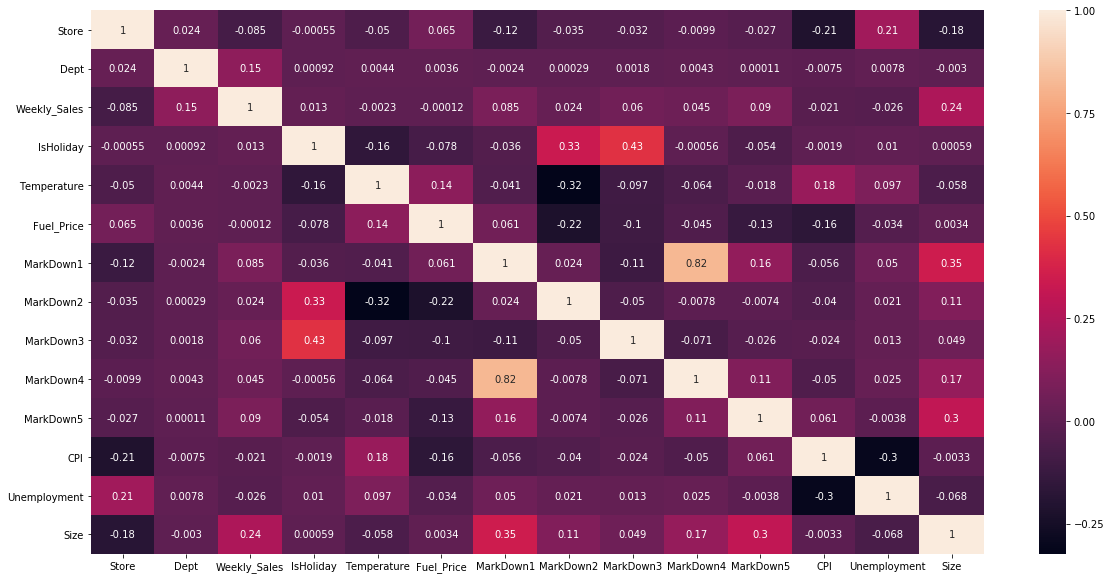

In [37]:
correlations = df.corr()
plt.figure(figsize = (20, 10))
sns.heatmap(data = correlations, annot = True)

## Limpeza do dado

* As colunas **MarkDown1**, **MarkDown2**, **MarkDown3**, **MarkDown4** e **MarkDown5** apresentam muitos "missing values". Vamos remover essas colunas.

### Removendo colunas com **"missing values"**

In [46]:
df.drop(columns = ["MarkDown1", "MarkDown2","MarkDown3","MarkDown4", "MarkDown5"], axis = 1, inplace = True)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315


In [47]:
df.shape

(421570, 11)

# Planejamento de aplicação de Machine Learning para resolver o problema.

O **XGBoost** é o algoritmo escolhido para analise. O **XGBoost** é um algoritmo do tipo ensemble que possui um alto desempenho, sendo um dos algoritmos mais utilizados para vencer competições no Kaggle. Por ser um problema de regressão, seria utilizado o **XGBRegressor**.

**PLanejamento:**
* **Conversão de variáveis** <br>

Primeiramente, será nescessário processar o dataset. Algumas colunas precisam ter o tipo das variáveis convertidos para que o modelo possa reconhecer e para facilitar a analise. Por exemplo,  a coluna **Date**  (tipo object) pode ser convertida para **datetime** (usando **pandas.to_datetime**) e a coluna **Type** (tipo object) pode ser convertidas usando **pandas.get_dummies**. 

* **Escolha das variáveis explicativas (features)**

No primeiro momento, uma forma de escolher as variáveis explicativas pode ser feita utilizando as variáveis que apresentam maior correlação com a variável resposta, e usa-las para treinar o modelo. Uma vantagem do **XGBoost** é que ele calcula as variáveis mais importantes (feature importance) e esse dado pode ser utilizado para escolha das variáveis explicativas. Outra forma de encontrar as melhores features, pode ser feita utilizando o **sklearn.feature_selection.SelectKBest**.

* **Dividir o dado em treinamento e validação**

Dividir em treinamento e validação (proporção de 80:20 ou 70:30, usando o **sklearn.model_selection.train_test_split**). Nessa etapa é importante separar um dado para treinamento e um dado para validação, para que se possa avaliar o quão genérico é o modelo e identificar possível sobreajuste (overfitting).

* **Escolha dos hiperparâmetros | Treinamento e avaliação do modelo**

Nesse momento serão definidos os hiperparâmetros, realização do treinamento e avaliação do modelo. Pode ser utilizado o **sklearn.model_selection.RandomizedSearchCV** ou  **sklearn.model_selection.GridSearchCV** para avaliar e definir quais hiperparâmetros tem o melhor desempenho.

* **Avaliação dos resultados e planejamento do aprimoramento do modelo**

Após a analise dos resultados, podem ser definidas estratégias para aprimoramento do modelo. Por exemplo, definição de novos hiperparâmetros, utilização de novos algoritmos, produção de novas features (feature engineering).

# Autocrítica e próximos passos

O **XGBoost** é um execelente algoritmo, porém, pode não ser o melhor para o dado em questão. Por isso é importante testar vários algoritmos e no final encontrar o que apresenta o melhor desempenho e que seja o mais genérico possível, evitando assim um modelo que tenha "decorado" o dado ou que tenha chegado ao limite de desempenho. Se tivesse tempo para tratar o problema, testaria outros algoritmos, pelo menos mais dois. **Random Forest** e **LightGBM**, por exemplo. Além disso, é possivel criar novas features que ajudem o modelo a ter um melhor desempenho. Por exemplo, a coluna **Date** pode ser quebrada em mais 3 colunas ( Ano, Mês e Semana) e pode ajudar o modelo a relacionar a semana e o mês em que os fériados ocorrem.